In [1]:
import csv
import pandas as pd
import requests
import os
from collections import defaultdict
from datetime import timedelta
import sklearn.linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import geopandas
import matplotlib

/home/gautam/.local/lib/python3.6/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
data=pd.read_csv("../dataset/pred_time.csv")

In [3]:
data

,Unnamed: 0,FacilityID,InstallYear,Diameter,break_date,CI,SPUN,SAND,DI,InstallYear_2,break_date_2,since_prev_break,prior_breaks
0,0,MAIN-6943-13636,1969,6.0,1997-01-02,0,0,0,1,1969-01-01,-8435.0,10228.0,0.0
1,1,MAIN-6336-18809,1959,8.0,1997-02-04,1,0,0,0,1959-01-01,-8402.0,13914.0,0.0
2,2,MAIN-5744-15604,1917,10.0,1997-10-08,0,0,1,0,1917-01-01,-8156.0,29500.0,0.0
3,3,MAIN-3749-6440,1950,6.0,1998-08-01,0,1,0,0,1950-01-01,-7859.0,17744.0,0.0
4,4,MAIN-6860-16497,1966,8.0,1998-08-21,1,0,0,0,1966-01-01,-7839.0,11920.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23143,23143,MAIN-1448-25169,2020,8.0,NaN,0,0,0,1,2020-01-01,NaN,inf,0.0
23144,23144,MAIN-1447-25170,2020,8.0,NaN,0,0,0,1,2020-01-01,NaN,inf,0.0
23145,23145,MAIN-2656-25171,1969,6.0,NaN,0,0,0,1,1969-01-01,NaN,inf,0.0
23146,23146,MAIN-2455-1168,1994,16.0,NaN,0,0,0,1,1994-01-01,NaN,inf,0.0


In [4]:
df=data[data["since_prev_break"]!=float('inf')]
df
#"break_date","InstallYear_2"

,Unnamed: 0,FacilityID,InstallYear,Diameter,break_date,CI,SPUN,SAND,DI,InstallYear_2,break_date_2,since_prev_break,prior_breaks
0,0,MAIN-6943-13636,1969,6.0,1997-01-02,0,0,0,1,1969-01-01,-8435.0,10228.0,0.0
1,1,MAIN-6336-18809,1959,8.0,1997-02-04,1,0,0,0,1959-01-01,-8402.0,13914.0,0.0
2,2,MAIN-5744-15604,1917,10.0,1997-10-08,0,0,1,0,1917-01-01,-8156.0,29500.0,0.0
3,3,MAIN-3749-6440,1950,6.0,1998-08-01,0,1,0,0,1950-01-01,-7859.0,17744.0,0.0
4,4,MAIN-6860-16497,1966,8.0,1998-08-21,1,0,0,0,1966-01-01,-7839.0,11920.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3400,3400,MAIN-2853-3313,1965,10.0,2019-09-25,1,0,0,0,1965-01-01,-134.0,19990.0,0.0
3401,3401,MAIN-4949-5931,2006,6.0,2019-09-28,0,0,0,1,2006-01-01,-131.0,5018.0,0.0
3402,3402,MAIN-2859-4488,1995,10.0,2019-10-02,0,0,0,1,1995-01-01,-127.0,2108.0,1.0
3403,3403,MAIN-6729-19170,1970,12.0,2019-10-06,0,0,0,1,1970-01-01,-123.0,18175.0,0.0


In [5]:
xcols = ["prior_breaks", "InstallYear","Diameter","CI","SPUN","SAND","DI","break_date_2"]
ycol = "since_prev_break"

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df[xcols], df[ycol], test_size=0.1)

In [7]:
from sklearn import linear_model
import numpy as np                   
    
clf=linear_model.Ridge(alpha=0.01)
clf.fit(X_train, y_train)
prediction=clf.predict(X_test)

prediction[prediction<0]=0

In [8]:
##Now retrain on the entire set and formulate predictions

In [9]:
clf2=linear_model.Ridge(alpha=0.01)
clf2.fit(df[xcols], df[ycol])
data=data.fillna(0)
prediction2=clf2.predict(data[xcols])

In [10]:
data=data.replace(float('inf'), np.nan)
data=data.fillna(0)
data["Predict"]=round(prediction2-data["since_prev_break"])/365
data[data["Predict"]<0]=0

In [11]:
wm = geopandas.read_file("zip://../dataset/WaterMains.zip")
wm

,OBJECTID,FacilityID,InstallYea,LifecycleS,Diameter,Material,Bagged,LiningType,Shape_STLe,geometry
0,1,MAIN-4869-1,1981,ACT,16.0,DI,0,CM,3.646795,"LINESTRING (818246.809 465305.287, 818250.456 ..."
1,2,MAIN-4869-2,1981,ACT,16.0,DI,0,CM,3.500123,"LINESTRING (818250.645 465308.776, 818250.456 ..."
2,3,MAIN-4969-3,1981,ACT,16.0,DI,0,CM,3.499850,"LINESTRING (819023.477 465921.541, 819025.375 ..."
3,4,MAIN-4969-4,1981,ACT,16.0,DI,0,CM,7.648740,"LINESTRING (819025.375 465918.600, 819032.423 ..."
4,5,MAIN-4969-5,1981,ACT,16.0,DI,0,CM,1127.874973,"LINESTRING (818330.485 465303.820, 818346.420 ..."
...,...,...,...,...,...,...,...,...,...,...
22515,419693,MAIN-1448-25169,2020,ACT,8.0,DI,1,CM,111.669489,"LINESTRING (773693.791 484574.175, 773693.674 ..."
22516,419694,MAIN-1447-25170,2020,ACT,8.0,DI,1,CM,831.525282,"LINESTRING (773691.327 484690.979, 773691.253 ..."
22517,420093,MAIN-2656-25171,1969,ACT,6.0,DI,1,CM,38.955988,"LINESTRING (788198.035 477702.644, 788198.153 ..."
22518,1168,MAIN-2455-1168,1994,ACT,16.0,DI,1,CM,516.630823,"LINESTRING (785556.369 477740.132, 785556.743 ..."


In [12]:
ms=wm.merge(data, on='FacilityID', how='left')
ms

,OBJECTID,FacilityID,InstallYea,LifecycleS,Diameter_x,Material,Bagged,LiningType,Shape_STLe,geometry,...,break_date,CI,SPUN,SAND,DI,InstallYear_2,break_date_2,since_prev_break,prior_breaks,Predict
0,1,MAIN-4869-1,1981,ACT,16.0,DI,0,CM,3.646795,"LINESTRING (818246.809 465305.287, 818250.456 ...",...,0,0.0,0.0,0.0,1.0,1981-01-01,0.0,0.0,0.0,33.657534
1,2,MAIN-4869-2,1981,ACT,16.0,DI,0,CM,3.500123,"LINESTRING (818250.645 465308.776, 818250.456 ...",...,0,0.0,0.0,0.0,1.0,1981-01-01,0.0,0.0,0.0,33.657534
2,3,MAIN-4969-3,1981,ACT,16.0,DI,0,CM,3.499850,"LINESTRING (819023.477 465921.541, 819025.375 ...",...,0,0.0,0.0,0.0,1.0,1981-01-01,0.0,0.0,0.0,33.657534
3,4,MAIN-4969-4,1981,ACT,16.0,DI,0,CM,7.648740,"LINESTRING (819025.375 465918.600, 819032.423 ...",...,0,0.0,0.0,0.0,1.0,1981-01-01,0.0,0.0,0.0,33.657534
4,5,MAIN-4969-5,1981,ACT,16.0,DI,0,CM,1127.874973,"LINESTRING (818330.485 465303.820, 818346.420 ...",...,0,0.0,0.0,0.0,1.0,1981-01-01,0.0,0.0,0.0,33.657534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23039,419693,MAIN-1448-25169,2020,ACT,8.0,DI,1,CM,111.669489,"LINESTRING (773693.791 484574.175, 773693.674 ...",...,0,0.0,0.0,0.0,1.0,2020-01-01,0.0,0.0,0.0,1.150685
23040,419694,MAIN-1447-25170,2020,ACT,8.0,DI,1,CM,831.525282,"LINESTRING (773691.327 484690.979, 773691.253 ...",...,0,0.0,0.0,0.0,1.0,2020-01-01,0.0,0.0,0.0,1.150685
23041,420093,MAIN-2656-25171,1969,ACT,6.0,DI,1,CM,38.955988,"LINESTRING (788198.035 477702.644, 788198.153 ...",...,0,0.0,0.0,0.0,1.0,1969-01-01,0.0,0.0,0.0,37.364384
23042,1168,MAIN-2455-1168,1994,ACT,16.0,DI,1,CM,516.630823,"LINESTRING (785556.369 477740.132, 785556.743 ...",...,0,0.0,0.0,0.0,1.0,1994-01-01,0.0,0.0,0.0,24.169863


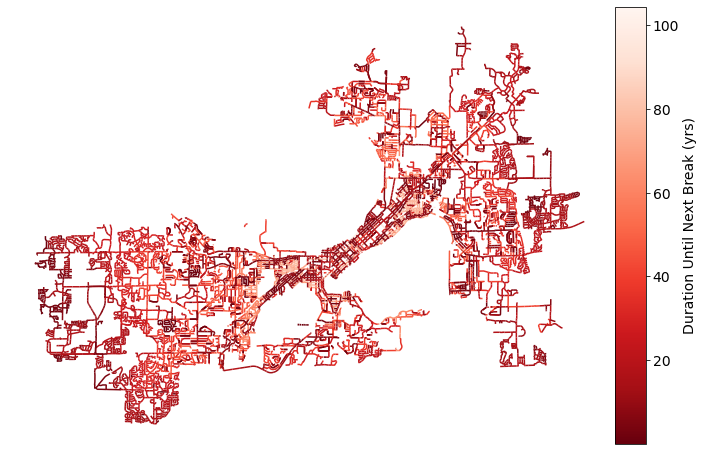

In [13]:
matplotlib.rcParams.update({'font.size': 14})

fig,ax = plt.subplots(figsize=(10,10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05,label="Risk")
ms.plot(column="Predict",cmap="Reds_r",ax=ax,legend=True,cax=cax,legend_kwds={'label': "Duration Until Next Break (yrs)"})
ax.axis("off")
plt.tight_layout()

In [19]:
ms=ms.sort_values(by='Predict')

In [20]:
ms.columns

Index(['OBJECTID', 'FacilityID', 'InstallYea', 'LifecycleS', 'Diameter_x',
       'Material', 'Bagged', 'LiningType', 'Shape_STLe', 'geometry',
       'Unnamed: 0', 'InstallYear', 'Diameter_y', 'break_date', 'CI', 'SPUN',
       'SAND', 'DI', 'InstallYear_2', 'break_date_2', 'since_prev_break',
       'prior_breaks', 'Predict'],
      dtype='object')

In [21]:
ms[["FacilityID","InstallYear","Material","geometry"]]

,FacilityID,InstallYear,Material,geometry
14784,MAIN-6760-16495,1983.0,DI,"LINESTRING (843273.373 473629.564, 843261.454 ..."
23002,MAIN-6860-16497,1966.0,CI,"LINESTRING (844620.496 473121.363, 844618.746 ..."
23004,MAIN-6860-16497,1966.0,CI,"LINESTRING (844552.731 473124.852, 844549.250 ..."
13324,MAIN-6651-14860,1967.0,CI,"LINESTRING (840964.008 481596.806, 840964.125 ..."
4934,MAIN-3059-4961,1967.0,CI,"LINESTRING (794049.994 475039.957, 794052.635 ..."
...,...,...,...,...
22885,MAIN-5063-9647,NaN,CI,"LINESTRING (821150.813 470592.680, 821150.783 ..."
22910,MAIN-4869-7,NaN,DI,"LINESTRING (816962.730 466017.142, 816979.349 ..."
22912,MAIN-4768-25022,NaN,DI,"LINESTRING (816990.869 466558.686, 816997.412 ..."
22936,MAIN-5926-18969,NaN,SPUN,"LINESTRING (833146.187 503595.115, 833151.185 ..."
